In [1]:
import numpy as np
import pandas as pd
import random
from scipy.io import wavfile
from sklearn.preprocessing import scale
import librosa.display
import librosa
import matplotlib.pyplot as plt
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def save_melspectrogram(directory_path, file_name, dataset_split, label, sampling_rate=44100):
    """ Will save spectogram into current directory"""
    
    path_to_file = os.path.join(directory_path, file_name)
    data, sr = librosa.load(path_to_file, sr=sampling_rate, mono=True)
    data = scale(data)

    melspec = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128)
    # Convert to log scale (dB) using the peak power (max) as reference
        # per suggestion from Librbosa: https://librosa.github.io/librosa/generated/librosa.feature.melspectrogram.html
    log_melspec = librosa.power_to_db(melspec, ref=np.max)  
    librosa.display.specshow(log_melspec, sr=sr)
    
    # create saving directory
    directory = './melspectrograms_selected/{dataset}/{label}'.format(dataset=dataset_split, label=label)
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    plt.savefig(directory + '/' + file_name.strip('.wav') + '.png')

In [4]:
def _train_test_split(filenames, train_pct):
    """Create train and test splits for ESC-50 data"""
    random.seed(2018)
    n_files = len(filenames)
    n_train = int(n_files*train_pct)
    train = np.random.choice(n_files, n_train, replace=False)
        
    # split on training indices
    training_idx = np.isin(range(n_files), train)
    training_set = np.array(filenames)[training_idx]
    testing_set = np.array(filenames)[~training_idx]
    print('\tfiles in training set: {}, files in testing set: {}'.format(len(training_set), len(testing_set)))
    
    return {'training': training_set, 'testing': testing_set}   

In [6]:


# Load meta data for audio files
meta_data = pd.read_csv(r"C:\\Users\\asus\\Downloads\\minor code\\coughdataset\\labels2.csv")

labs = meta_data.corona_test
unique_labels = labs.unique()

meta_data.head()

,date,corona_test,age,gender,medical_history,smoker,patient_reported_symptoms,cough_filename,Unnamed: 8,Unnamed: 9
0,Apr-21,negative,53.0,male,"none,",yes,"none,",neg-0421-083-cough-m-53.wav,NaN,m-53.wav
1,Apr-21,positive,50.0,male,"Congestive heart failure,",no,"Shortness of breath,",pos-0421-084-cough-m-50.wav,NaN,m-50.wav
2,Apr-21,negative,43.0,male,"none,",no,"Sore throat,",neg-0421-085-cough-m-43.wav,NaN,m-43.wav
3,Apr-21,positive,65.0,male,"Asthma or chronic lung disease,",no,"Shortness of breath,New or worsening cough,",pos-0421-086-cough-m-65.wav,NaN,m-65.wav
4,Apr-21,positive,40.0,female,"none,",no,"Sore throat,Loss of taste,Loss of smell,",pos-0421-087-cough-f-40.wav,NaN,f-40.wav


Proccesing negative audio files
	files in training set: 4, files in testing set: 17
Proccesing positive audio files
	files in training set: 3, files in testing set: 16


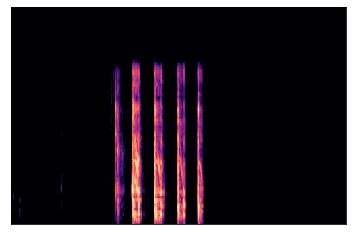

In [11]:
for label in unique_labels:
    
    print("Proccesing {} audio files".format(label))
    
    current_label_meta_data = meta_data[meta_data.corona_test == label]
    
    datasets = _train_test_split(current_label_meta_data.cough_filename, train_pct=0.2)
    
    for dataset_split, audio_files in datasets.items():
        
        for filename in audio_files:
            
            directory_path = r"C:\\Users\\asus\\Downloads\\minor code\\coughdataset\\pos"
            
            save_melspectrogram(directory_path, filename, dataset_split, label, sampling_rate=44100)